#TD3 - Diagnostic du cancer du sein 

In [64]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv('dataset/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Colonnes inutiles:
On va supprimer les colonnes qui ne sont pas utiles pour la prédiction du cancer du sein:
- 'Unnamed: 32' : colonne vide
- 'id' : identifiant du patient

### Sortie attendues:
- 'diagnosis' : M = Maligne, B = Bénigne

### Valeurs des données:
Certaines données sont trop élevée par rapport a d'autre. Il faut donc les normaliser. Car cela fausse le biais.

### Normalisation
Pour normaliser: (x - min) / (max - min)

In [65]:
import sklearn as sk
from sklearn import preprocessing

# change diagnosis column to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
# drop id and Unnamed: 32 columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# normalize data without diagnosis column
X_normalized = preprocessing.normalize(df.values[:,1:])
# add diagnosis column to normalized data
X_normalized = np.insert(X_normalized, 0, df.values[:,0], axis=1)

# back to dataframe
X_normalized = pd.DataFrame(X_normalized)
X_normalized.columns = df.columns

X_normalized.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,1.0,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,1.0,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,1.0,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,1.0,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized.values[:,1:], X_normalized.values[:,0], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 30)
(114, 30)
(455,)
(114,)


### Nombres d'entrées
30 entrées

### Nombres de sorties
1 sortie

### Fontions d'activation
- Sigmoid

In [67]:
import os
import torch
import torch.nn as nn
from torch.nn.modules.activation import Threshold
from sklearn.datasets import make_circles
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tqdm as notebook_tqdm

In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [69]:
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.archiNN = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.archiNN(x)
    
model = DNN(30, 16, 1).to(device)

In [70]:
batch_size = 16

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [71]:
train_losses = []
train_accuracies = []
train_precions = []

In [72]:
def train(dataloader, model, loss_fn, optimizer, num_epoch):
    size = len(train_loader.dataset)

    for epoch in notebook_tqdm.tqdm(range(num_epoch)):
        epoch_loss = 0.0
        nombre_vp = 0
        nombre_vn = 0
        nombre_fp = 0
        nombre_fn = 0

        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss = loss_fn(y_pred, y.unsqueeze(1))
            epoch_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # train_accuracies.append(accuracy_score(y.cpu().numpy(), y_pred.cpu().detach().numpy().round()))

            for i in range(len(y)):
                if y[i] == 1 and y_pred[i] >= 0.5:
                    nombre_vp += 1
                elif y[i] == 0 and y_pred[i] < 0.5:
                    nombre_vn += 1
                elif y[i] == 0 and y_pred[i] >= 0.5:
                    nombre_fp += 1
                elif y[i] == 1 and y_pred[i] < 0.5:
                    nombre_fn += 1

        train_losses.append(epoch_loss/size)
        train_precions.append(nombre_vp/((nombre_vp + nombre_fp) + 1e-12))
        train_accuracies.append((nombre_vp + nombre_vn)/((nombre_vp + nombre_vn + nombre_fp + nombre_fn) + 1e-12))

In [73]:
train(train_loader, model, loss_fn, optimizer, 100)

100%|██████████| 100/100 [00:05<00:00, 19.11it/s]


In [74]:
test_losses = []
test_accuracies = []
test_precions = []

In [75]:
def test(dataloader, model, loss_fn, num_epoch):
    size = len(test_loader.dataset)

    for num_epoch in notebook_tqdm.tqdm(range(num_epoch)):
        epoch_loss = 0.0
        nombre_vp = 0
        nombre_vn = 0
        nombre_fp = 0
        nombre_fn = 0
        
        with torch.no_grad():
            for X, y in dataloader:
                X, y = X.to(device), y.to(device)
                pred = model(X)
                loss = loss_fn(pred, y.unsqueeze(1))
                epoch_loss += loss.item()

                for i in range(len(y)):
                    if y[i] == 1 and pred[i] >= 0.5:
                        nombre_vp += 1
                    elif y[i] == 0 and pred[i] < 0.5:
                        nombre_vn += 1
                    elif y[i] == 0 and pred[i] >= 0.5:
                        nombre_fp += 1
                    elif y[i] == 1 and pred[i] < 0.5:
                        nombre_fn += 1
                
        test_losses.append(epoch_loss/size)
        test_precions.append(nombre_vp/((nombre_vp + nombre_fp) + 1e-12))
        test_accuracies.append((nombre_vp + nombre_vn)/((nombre_vp + nombre_vn + nombre_fp + nombre_fn) + 1e-12))

In [76]:
test(test_loader, model, loss_fn, 100)

100%|██████████| 100/100 [00:00<00:00, 140.54it/s]


<Figure size 640x480 with 0 Axes>

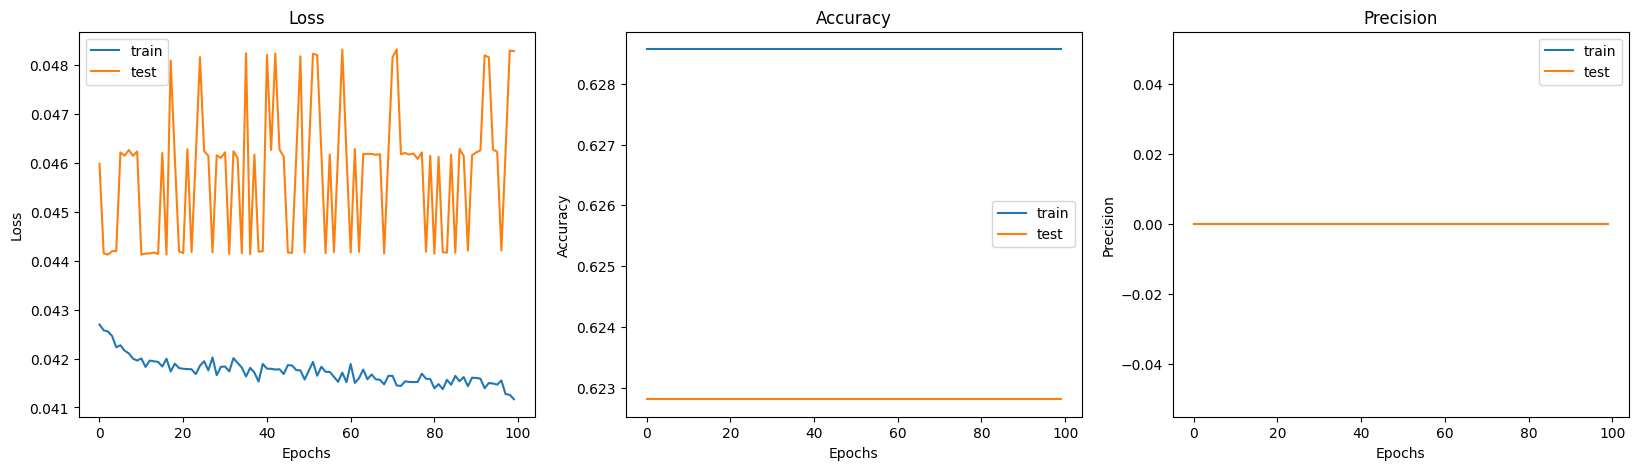

In [77]:
plt.clf()

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='train')
plt.plot(test_accuracies, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.subplot(1, 3, 3)
plt.plot(train_precions, label='train')
plt.plot(test_precions, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision')

plt.show()